<a href="https://colab.research.google.com/github/srinivasgolla600/covid_prediction/blob/main/COVID19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** ** **COVID-19 Prediction**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import *
import plotly as ppy
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Data

---



In [ ]:
url ="/content/drive/MyDrive/DATA_sets/corona_tested_006.csv"

In [ ]:
original_df=pd.read_csv(url)

<ipython-input-7-a34b0b9a1f3b>:1: DtypeWarning:

Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df=original_df.copy()

# Data Cleaning

---



In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
df.shape

(278848, 11)

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
for i in df:
  print(i, ":", df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Corona : 

In [ ]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
df['Cough_symptoms'].mode()[0]

False

In [ ]:
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'false' if x==False else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Cough_symptoms'].replace('none', df['Cough_symptoms'].mode()[0],inplace=True)# inplace=True

In [ ]:
df['Cough_symptoms'].value_counts()

false    236620
true      42228
Name: Cough_symptoms, dtype: int64

In [ ]:
df["Corona"].value_counts()


negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
df["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [ ]:
df["Fever"].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [ ]:
df["Age_60_above"].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
df['Fever']=df['Fever'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Fever']=df['Fever'].apply(lambda x: 'false' if x==False else x)
df['Fever']=df['Fever'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Fever'].replace('none', df['Fever'].mode()[0],inplace=True)

In [ ]:
df['Fever'].value_counts()

false    257096
true      21752
Name: Fever, dtype: int64

In [ ]:
df['Sore_throat']=df['Sore_throat'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'false' if x==False else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Sore_throat'].replace('none', df['Sore_throat'].mode()[0],inplace=True)

In [ ]:
df['Sore_throat'].value_counts()

false    276922
true       1926
Name: Sore_throat, dtype: int64

In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'false' if x==False else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Shortness_of_breath'].replace('none', df['Shortness_of_breath'].mode()[0],inplace=True)

In [ ]:
df['Shortness_of_breath'].value_counts()

false    277271
true       1577
Name: Shortness_of_breath, dtype: int64

In [ ]:
df['Headache']=df['Headache'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Headache']=df['Headache'].apply(lambda x: 'false' if x==False else x)
df['Headache']=df['Headache'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Headache'].replace('none', df['Headache'].mode()[0],inplace=True)

In [ ]:
df['Headache'].value_counts()

false    276434
true       2414
Name: Headache, dtype: int64

In [ ]:
sex_mode = df['Sex'].mode()[0]
df['Sex'] = df['Sex'].replace('None', sex_mode)

In [ ]:
df['Sex'].value_counts()

female    149721
male      129127
Name: Sex, dtype: int64

In [ ]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
age_mode = df['Age_60_above'].mode()[0]
print(age_mode)

None


In [ ]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
print(df['Age_60_above'].unique())


['None' 'No' 'Yes']


In [ ]:
for i in df:
  print(i, ":", df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['true' 'false']
Fever : ['false' 'true']
Sore_throat : ['true' 'false']
Shortness_of_breath : ['false' 'true']
Headache : ['false' 'true']
Corona : ['negative' 'positive']
Age_60_above : ['None' 'No' 'Yes']
Sex : ['female' 'male']
Known_c

# Duckcb sql Analysis

---



In [ ]:
import duckdb

In [ ]:
conn=duckdb.connect()
conn.register("df",df)


1.Find the number of corona patients who faced shortness of breath.

2.Find the number of negative corona patients who have fever and sore_throat.

3.Group the data by month and rank the number of positive cases.

4.Find the female negative corona patients who faced cough and headache.

5.How many elderly corona patients have faced breathing problems?

6.Which three symptoms were more common among COVID positive patients?

7.Which symptom was less common among COVID negative people?

8.What are the most common symptoms among COVID positive males whose known contact was abroad?

In [ ]:
conn.execute("select * from df limit 5").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,female,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed


In [ ]:
#1.Find the number of corona patients who faced shortness of breath.
conn.execute("select count(*) from df where Shortness_of_breath ='true' and Corona='positive'").fetchdf()

,count_star()
0,1164


In [ ]:
#2.Find the number of negative corona patients who have fever and sore_throat.
conn.execute("select count(*) from df where sore_throat ='true' and Corona='negative' and fever='true'").fetchdf()

,count_star()
0,121


In [ ]:

df['Test_month'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y').dt.month

# Display the DataFrame with the new 'Test_month' column
print(df[['Test_date', 'Test_month']])


         Test_date  Test_month
0       11-03-2020           3
1       11-03-2020           3
2       11-03-2020           3
3       11-03-2020           3
4       11-03-2020           3
...            ...         ...
278843  30-04-2020           4
278844  30-04-2020           4
278845  30-04-2020           4
278846  30-04-2020           4
278847  30-04-2020           4

[278848 rows x 2 columns]


In [ ]:
#3.Group the data by month and rank the number of positive cases.
conn.execute("""
    SELECT
        Test_month,
        RANK() OVER (PARTITION BY Test_month ORDER BY COUNT(*) DESC) AS positive_rank,
        COUNT(*) AS positive_cases
    FROM df
    WHERE Corona = 'positive'
    GROUP BY Test_month
    ORDER BY Test_month
""").fetchdf()



,Test_month,positive_rank,positive_cases
0,3,1,5848
1,4,1,8881


In [ ]:
#4.Find the female negative corona patients who faced cough and headache.
conn.execute("select * from df where Corona='negative'  and Sex ='female'  and Cough_symptoms='true' and headache='true' ").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Test_month
0,340,12-03-2020,true,true,false,false,true,negative,None,female,Abroad,3
1,493,12-03-2020,true,true,false,false,true,negative,None,female,Other,3
2,511,12-03-2020,true,false,false,false,true,negative,None,female,Abroad,3
3,936,13-03-2020,true,true,true,false,true,negative,None,female,Abroad,3
4,1113,13-03-2020,true,false,false,false,true,negative,None,female,Abroad,3
5,1481,13-03-2020,true,true,false,false,true,negative,None,female,Abroad,3
6,1523,13-03-2020,true,false,true,false,true,negative,None,female,Contact with confirmed,3
7,1526,13-03-2020,true,false,false,false,true,negative,None,female,Contact with confirmed,3
8,1528,13-03-2020,true,false,true,false,true,negative,None,female,Contact with confirmed,3
9,1532,13-03-2020,true,false,false,false,true,negative,None,female,Contact with confirmed,3


In [ ]:
#How many elderly corona patients have faced breathing problems?
conn.execute("select count(*) from df where Corona='positive'  and Age_60_above ='Yes'  and Shortness_of_breath='true'").fetchdf()

,count_star()
0,263


In [ ]:
#6.Which three symptoms were more common among COVID positive patients?
conn.execute("""
   select
    count(*) AS symptom_count,
    cough_symptoms,
    fever,
    sore_throat,
    shortness_of_breath,
    headache
from df
where corona = 'positive'
group by cough_symptoms, fever, sore_throat, shortness_of_breath, headache
order by symptom_count DESC
LIMIT 3;
""").fetchdf()

,symptom_count,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
0,5312,false,false,false,false,false
1,2166,true,true,false,false,false
2,2133,true,false,false,false,false


In [ ]:
#7.Which symptom was less common among COVID negative people?

conn.execute("""
   select
    count(*) AS symptom_count,
    cough_symptoms,
    fever,
    sore_throat,
    shortness_of_breath,
    headache
from df
where corona = 'negative'
group by cough_symptoms, fever, sore_throat, shortness_of_breath, headache
order by symptom_count asc
LIMIT 1;
""").fetchdf()

,symptom_count,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
0,1,false,true,false,true,true


In [ ]:
#8.What are the most common symptoms among COVID positive males whose known contact was abroad?

conn.execute("""SELECT
    COUNT(*) AS symptom_count,
    Cough_symptoms,
    Fever,
    Sore_throat,
    Shortness_of_breath,
    Headache
FROM df
WHERE Corona = 'positive'
    AND Sex = 'male'
    AND Known_contact = 'Abroad'
GROUP BY Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache
ORDER BY symptom_count DESC
LIMIT 1""").fetchdf()

,symptom_count,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
0,189,true,false,false,false,false


# **EDA

---



```
# This is formatted as code
```

**

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Display basic statistics of numerical columns
print(df.describe())

# Display information about the DataFrame (data types, non-null counts)
print(df.info())
print(df.shape)


   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           true  false        true               false   
1       2  11-03-2020          false   true       false               false   
2       3  11-03-2020          false   true       false               false   
3       4  11-03-2020           true  false       false               false   
4       5  11-03-2020           true  false       false               false   

  Headache    Corona Age_60_above     Sex           Known_contact  
0    false  negative         None  female                  Abroad  
1    false  positive         None  female                  Abroad  
2    false  positive         None  female                  Abroad  
3    false  negative         None  female                  Abroad  
4    false  negative         None  female  Contact with confirmed  
              Ind_ID
count  274956.000000
mean   139523.837338
std     80520.445132
min         1.000000
25%     6984

In [ ]:
# Use loc to drop rows where 'Corona' is 'other'
df = df.loc[df['Corona'] != 'other']

<Axes: xlabel='Corona', ylabel='Sore_throat'>

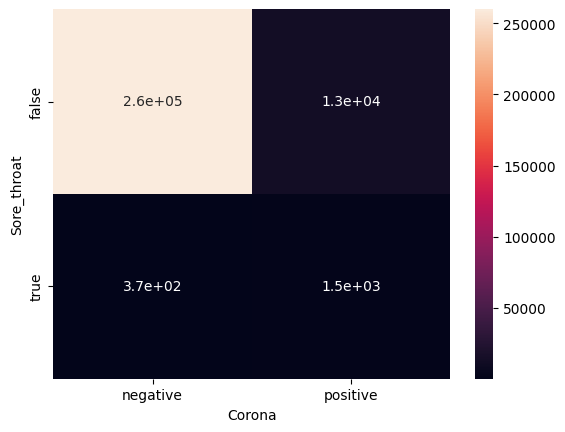

In [ ]:
# relationshio vetween two categorical variable # sex, and smoker
sns.heatmap(pd.crosstab(df['Sore_throat'],df['Corona']),annot=True)

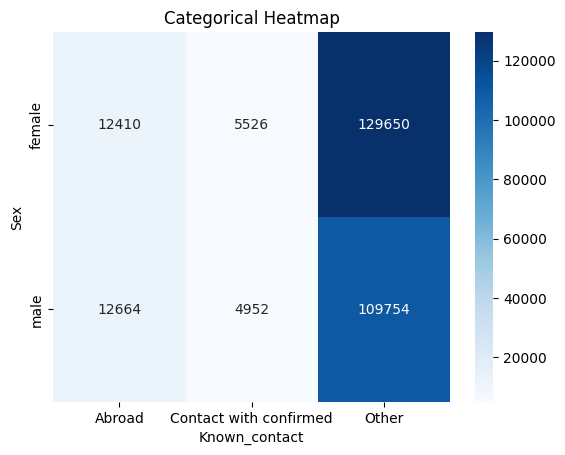

In [ ]:
# Example: Categorical heatmap for 'Sex' and 'Known_contact'
cross_tab = pd.crosstab(df['Sex'], df['Known_contact'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Categorical Heatmap')
plt.show()


<Axes: xlabel='Sore_throat', ylabel='count'>

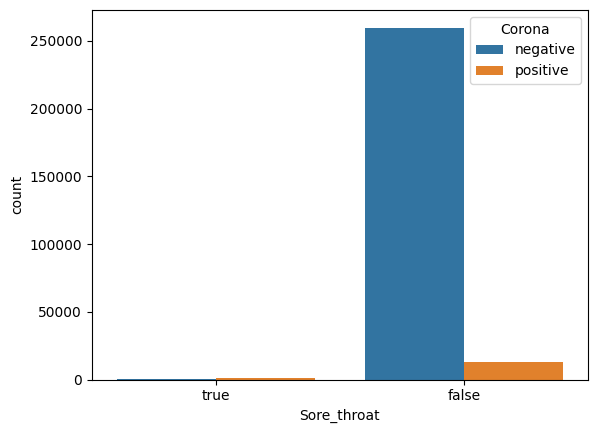

In [ ]:
sns.countplot(x='Sore_throat', hue='Corona', data=df)

In [ ]:
fig=px.pie(data_frame=df,names="Known_contact")
fig

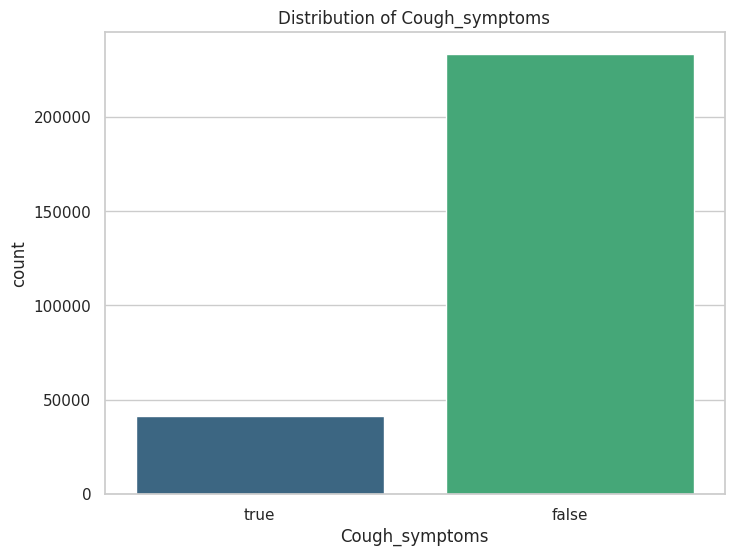

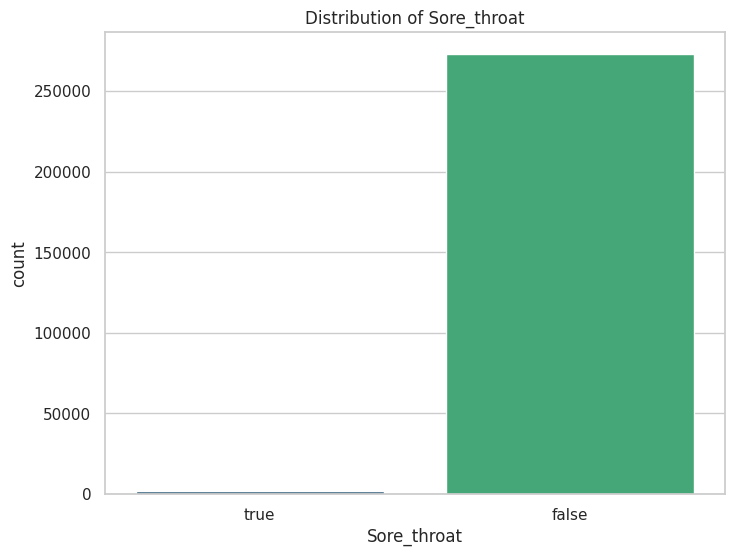

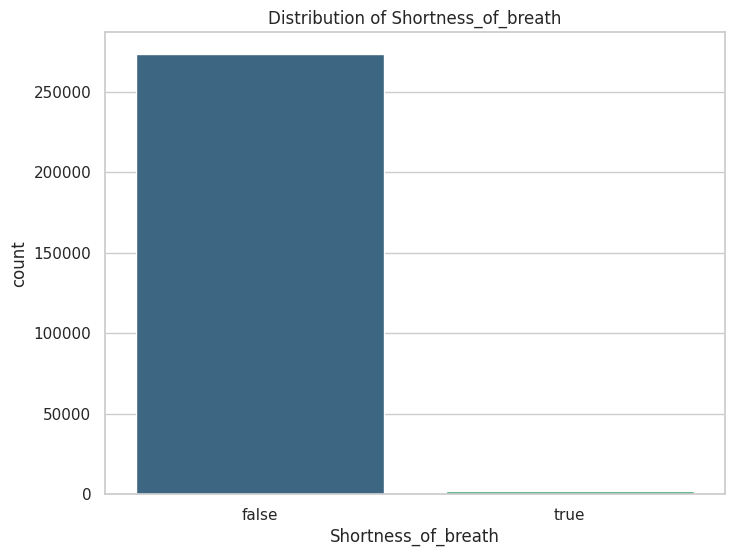

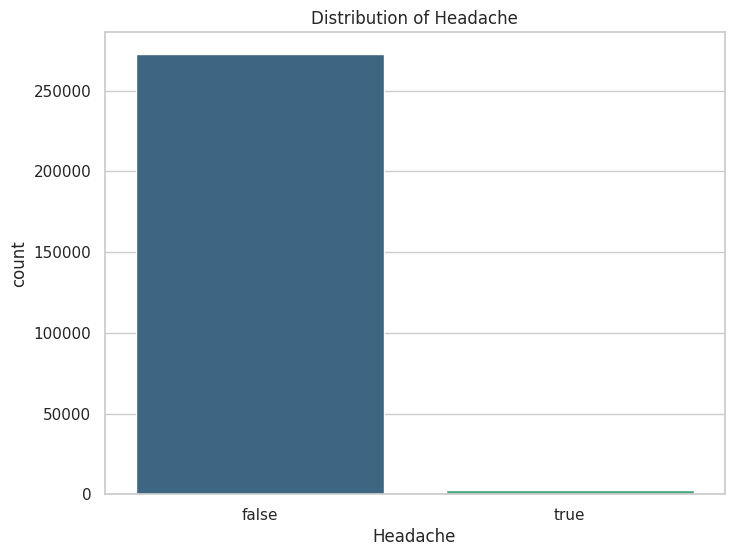

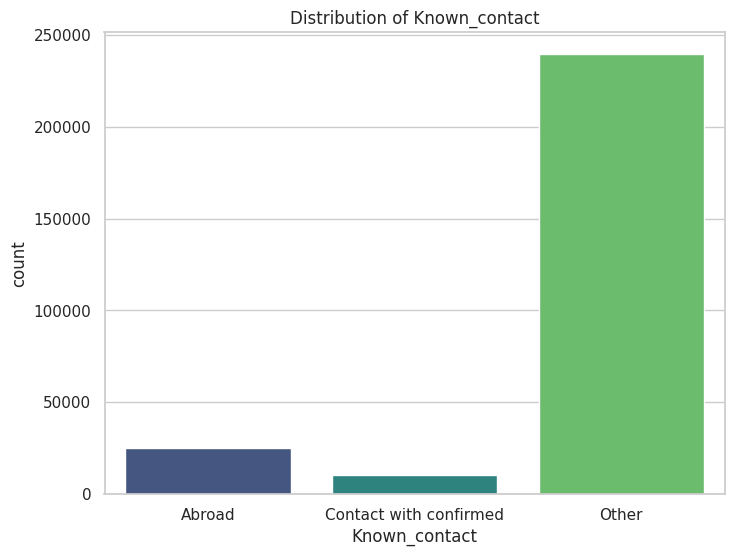

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Select the features of interest
features_of_interest = ['Cough_symptoms', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']

# Plot histograms for each feature
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette="viridis")
    plt.title(f'Distribution of {feature}')
    plt.show()


# Chi square testing to check the hypothesis

---



Hypothesis 1: Symptom Significance in COVID-19 Prediction

Statement: Symptoms like cough, fever, and shortness of breath will be significant predictors of COVID-19 infection.

Test: Chi-square Test

Procedure:

Null Hypothesis (H0): There is no association between symptoms (cough, fever, sore throat, shortness of breath, headache) and COVID-19 infection.
Alternative Hypothesis (H1): There is a significant association between symptoms and COVID-19 infection.

Results:

Chi-square value: 21290.64
P-value: 0.0 (Significant at a 5% significance level)
Conclusion:

We reject the null hypothesis, indicating a significant association between symptoms and COVID-19 infection.

In [ ]:
from scipy.stats import chi2_contingency

# Example: Chi-square test for 'Sore_throat' and 'Corona'
contingency_table = pd.crosstab(df['Sore_throat'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square value: 21290.644868638272
P-value: 0.0


In [ ]:
# Example: Chi-square test for 'Cough_symptoms' and 'Corona'
contingency_table = pd.crosstab(df['Cough_symptoms'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


Chi-square value: 10609.529767154772
P-value: 0.0


In [ ]:
# Example: Chi-square test for 'Fever' and 'Corona'
contingency_table = pd.crosstab(df['Fever'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 19489.55233920404
P-value: 0.0


In [ ]:
# Example: Chi-square test for 'Shortness_of_breath' and 'Corona'
contingency_table = pd.crosstab(df['Shortness_of_breath'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 14951.005265593401
P-value: 0.0


In [ ]:
# Example: Chi-square test for 'Headache' and 'Corona'
contingency_table = pd.crosstab(df['Headache'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 37061.47784842176
P-value: 0.0


In [ ]:
# Example: Chi-square test for 'Sex' and 'Corona'
contingency_table = pd.crosstab(df['Sex'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 139.54358298541194
P-value: 3.349829634729112e-32


In [ ]:
# Example: Chi-square test for 'Known_contact' and 'Corona'
contingency_table = pd.crosstab(df['Known_contact'], df['Corona'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 90526.50708263667
P-value: 0.0


In [ ]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

# Preprocessing and Label Encoding


---



In [ ]:
da=df.copy()

In [ ]:
da.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,None,female,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,None,female,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed


In [ ]:
# Drop unnecessary columns
da.drop(['Ind_ID', 'Test_date'], axis=1, inplace=True)


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
for column in ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']:
    da[column] = label_encoder.fit_transform(da[column])

In [ ]:
da.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,1,0,0
2,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1


# FEATURE SELECTION USING  >>Recursive Feature Elimination<<

---



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' contains your data and 'Corona' is the target variable
# Select relevant categorical columns (excluding 'Corona' which is the target)
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact', 'Sex']

# Create a subset DataFrame with only the selected columns
X_categorical = da[categorical_columns]

# Label encode categorical variables
label_encoder = LabelEncoder()
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)

# Target variable ('Corona')
y = label_encoder.fit_transform(da['Corona'])

# Specify the estimator (SVR)
estimator = SVR(kernel="linear")

# Initialize RFE with the estimator and the number of features to select
selector = RFE(estimator, n_features_to_select=5, step=1)

# Fit RFE on the encoded categorical features and target variable
selector = selector.fit(X_categorical_encoded, y)

# Print the support (selected features)
print("Selected Features:")
print(selector.support_)

# Print the ranking of features
print("Feature Ranking:")
print(selector.ranking_)


Selected Features:
[ True False  True  True  True  True False]
Feature Ranking:
[1 3 1 1 1 1 2]


The features 'Cough_symptoms', 'Sore_throat', 'Shortness_of_breath', 'Headache', and 'Known_contact' are selected, and they have the lowest ranking of 1, indicating higher importance

# Train_Test _split

---



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select features and target variable
X = da[['Cough_symptoms', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']]
y = da['Corona']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression:

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9561936281640966
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     52041
           1       0.82      0.23      0.36      2951

    accuracy                           0.96     54992
   macro avg       0.89      0.62      0.67     54992
weighted avg       0.95      0.96      0.94     54992



#Hypothesis 2: Decision Tree Outperforms Random Forest

---



Statement: The Decision Tree model will have higher accuracy in predicting COVID-19 compared to the Random Forest model.

Test: Model Comparison

Procedure:

1.Train Decision Tree and Random Forest models on the dataset.


2.Evaluate and compare the accuracy of both models.

Results:



Decision Tree Accuracy: 96.59%


Random Forest Accuracy: 96.59%


Logistic Regression Accuracy: 95.62%

Conclusion:

Both Decision Tree and Random Forest models perform similarly, with high accuracies.
No significant evidence to reject the hypothesis that Decision Tree outperforms Random Forest.

# Decision Tree:

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 0.9658677625836485
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52041
           1       0.71      0.61      0.66      2951

    accuracy                           0.97     54992
   macro avg       0.84      0.80      0.82     54992
weighted avg       0.96      0.97      0.96     54992



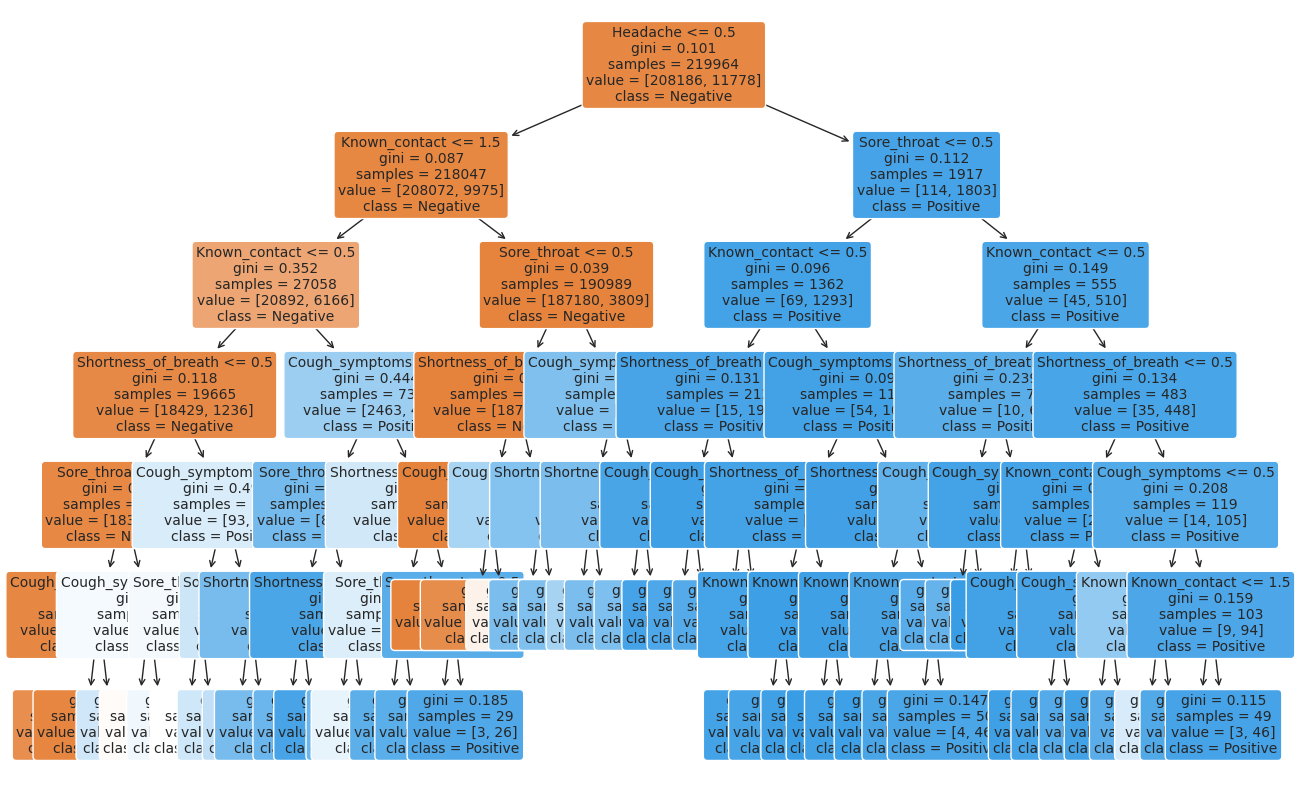

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt



# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=X_train.columns, class_names=['Negative', 'Positive'],filled=True, rounded=True, fontsize=10)
plt.show()

# Random Forest:

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy_random_forest}")
print(classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 0.9659223159732324
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52041
           1       0.71      0.61      0.66      2951

    accuracy                           0.97     54992
   macro avg       0.84      0.80      0.82     54992
weighted avg       0.96      0.97      0.96     54992



In [ ]:
import plotly.graph_objects as go

# Replace these values with your actual accuracies and models
accuracies = [0.956, 0.966, 0.966]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Create a bar chart
fig = go.Figure(data=[go.Bar(x=models, y=accuracies, marker_color=['blue', 'green', 'orange'])])

# Add title and labels
fig.update_layout(title_text='Model Accuracies',
                  xaxis_title='Models',
                  yaxis_title='Accuracy')

# Show the chart
fig.show()


# Decision tree model fit check -overfit/under fit

---



In [ ]:
# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")


Training Accuracy: 0.9666263570402429


In [ ]:
# Predictions on the test set
y_test_pred = decision_tree_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9658677625836485


Compare the training accuracy with the test accuracy.

 Our Decision Tree model seems to have similar performance on both the training and test sets, with a training accuracy of approximately 96.66% and a test accuracy of approximately 96.59%. This indicates that your model is not showing signs of overfitting or underfitting, as the accuracies on the training and test sets are close.

# **Documentation**

---



Project Documentation: Impact on Disease Prediction in Medical Field

**Importance in Today's World:**

In today's world, where healthcare resources are precious, accurate disease prediction is paramount. The proposed project focuses on predicting COVID-19 infection based on symptoms and other factors. This is particularly important in the current global scenario where infectious diseases can spread rapidly. The ability to identify potential cases early helps in implementing timely preventive measures, reducing the spread, and allocating resources efficiently.

**Impact on Medical Field:**

Effective Screening:

Accurate prediction models aid in early identification of potential COVID-19 cases.

Early screening allows for prompt isolation and treatment, preventing further transmission.

Resource Optimization:

Healthcare resources, including testing kits and medical personnel, can be utilized more efficiently.



Hospitals can better manage patient influx and allocate resources based on predicted cases.

Reducing Healthcare Burden:

By predicting and isolating potential cases early, the burden on healthcare systems is reduced.



This can prevent overwhelming hospital capacities, ensuring better care for those in need.

Future Implications and Knowledge Gap:

Applicability to Other Diseases:

The methodology developed in this project can serve as a blueprint for predicting other infectious diseases.
By adapting the model features and training data, similar approaches can be employed for different health threats.
Potential Knowledge Gap:

While the project focuses on COVID-19, there may be a knowledge gap in predicting and managing other emerging diseases.
Future research can extend the proposed method to address various infectious diseases, contributing to a comprehensive disease prediction framework.
Technological Integration:

As technology advances, integrating more data sources (e.g., wearable devices, environmental factors) can enhance prediction accuracy.
The project lays the foundation for incorporating new technologies into disease prediction models.

Conclusion:
In conclusion, the proposed project holds significant importance in today's world by offering a practical and effective way to predict and manage infectious diseases. It contributes to the optimization of healthcare resources, efficient screening, and, importantly, serves as a potential model for addressing emerging health challenges in the future.